In [1]:
# Install necessary libraries
!pip install --upgrade google-cloud-storage pandas matplotlib seaborn

# Import necessary libraries
from google.colab import auth
from google.cloud import storage
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Authenticate
auth.authenticate_user()

# Create a client to access Google Cloud Storage
client = storage.Client()

# Specify the bucket and file name
bucket_name = 'databuck1'
file_name = 'DataCoSupplyChainDataset.csv'

# Download the CSV file from Google Cloud Storage
bucket = client.get_bucket(bucket_name)
blob = bucket.blob(file_name)
blob.download_to_filename(file_name)

# Load the CSV file into a pandas DataFrame
data = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
data.head()

,Type,Days_for_shipping_real,Days_for _shipment_scheduled,Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,...,Order_Zipcode,Product_Card_Id,Product_Category_Id,Product_Description,Product_Image,Product_Name,Product_Price,Product_Status,shipping_date_DateOrders,Shipping_Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [5]:
# Display basic information about the DataFrame
data.info()

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Fill missing values for numeric columns with the mean
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing values for non-numeric columns with the mode (most frequent value)
non_numeric_cols = data.select_dtypes(exclude=['float64', 'int64']).columns
data[non_numeric_cols] = data[non_numeric_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Drop duplicates if any
data.drop_duplicates(inplace=True)

# Convert data types if necessary (example: converting 'date' column to datetime)
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])

# Verify the changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Type                          180519 non-null  object 
 1   Days_for_shipping_real        180519 non-null  int64  
 2   Days_for _shipment_scheduled  180519 non-null  int64  
 3   Benefit_per_order             180519 non-null  float64
 4   Sales_per_customer            180519 non-null  float64
 5   Delivery_Status               180519 non-null  object 
 6   Late_delivery_risk            180519 non-null  int64  
 7   Category_Id                   180519 non-null  int64  
 8   Category_Name                 180519 non-null  object 
 9   Customer_City                 180519 non-null  object 
 10  Customer_Country              180519 non-null  object 
 11  Customer_Email                180519 non-null  object 
 12  Customer_Fname                180519 non-nul

In [6]:
# Display basic statistics of the DataFrame
data.describe()

,Days_for_shipping_real,Days_for _shipment_scheduled,Benefit_per_order,Sales_per_customer,Late_delivery_risk,Category_Id,Customer_Id,Customer_Zipcode,Department_Id,Latitude,...,Order_Item _Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Order_Zipcode,Product_Card_Id,Product_Category_Id,Product_Description,Product_Price,Product_Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.149165,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,11840.222709,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,55426.132327,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,55426.132327,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,55426.132327,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [8]:
# Display column names
print(data.columns)

Index(['Type', 'Days_for_shipping_real', 'Days_for _shipment_scheduled',
       'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status',
       'Late_delivery_risk', 'Category_Id', 'Category_Name', 'Customer_City',
       'Customer_Country', 'Customer_Email', 'Customer_Fname', 'Customer_Id',
       'Customer_Lname', 'Customer_Password', 'Customer_Segment',
       'Customer_State', 'Customer_Street', 'Customer_Zipcode',
       'Department_Id', 'Department_Name', 'Latitude', 'Longitude', 'Market',
       'Order_City', 'Order_Country', 'Order_Customer_Id',
       'order_date_DateOrders', 'Order_Id', 'Order_Item_Cardprod Id',
       'Order_Item_Discount', 'Order_item_Discount_Rate', 'Order_Item_Id',
       'Order_Item_Product_Price', 'Order_Item_Profit_Ratio',
       'Order_Item _Quantity', 'Sales', 'Order_Item_Total',
       'Order_Profit_Per_Order', 'Order_Region', 'Order_State', 'Order_Status',
       'Order_Zipcode', 'Product_Card_Id', 'Product_Category_Id',
       'Product_Descri

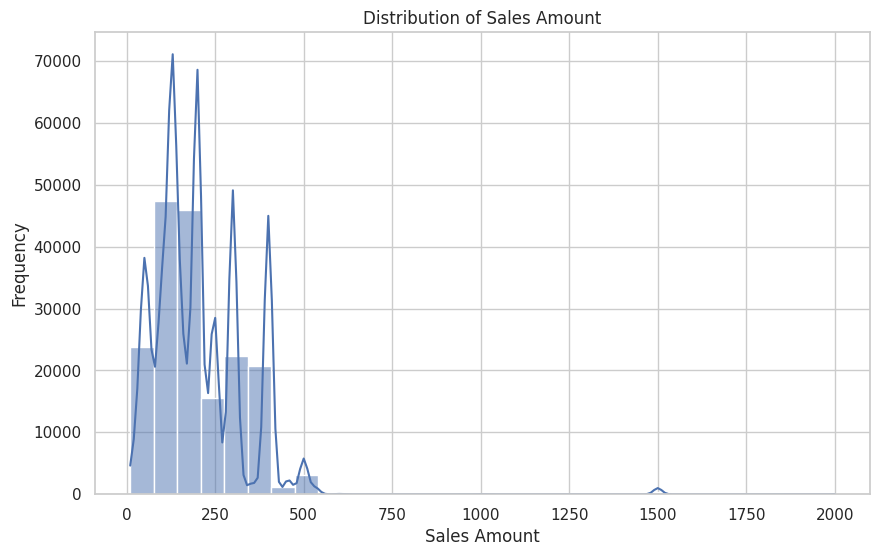

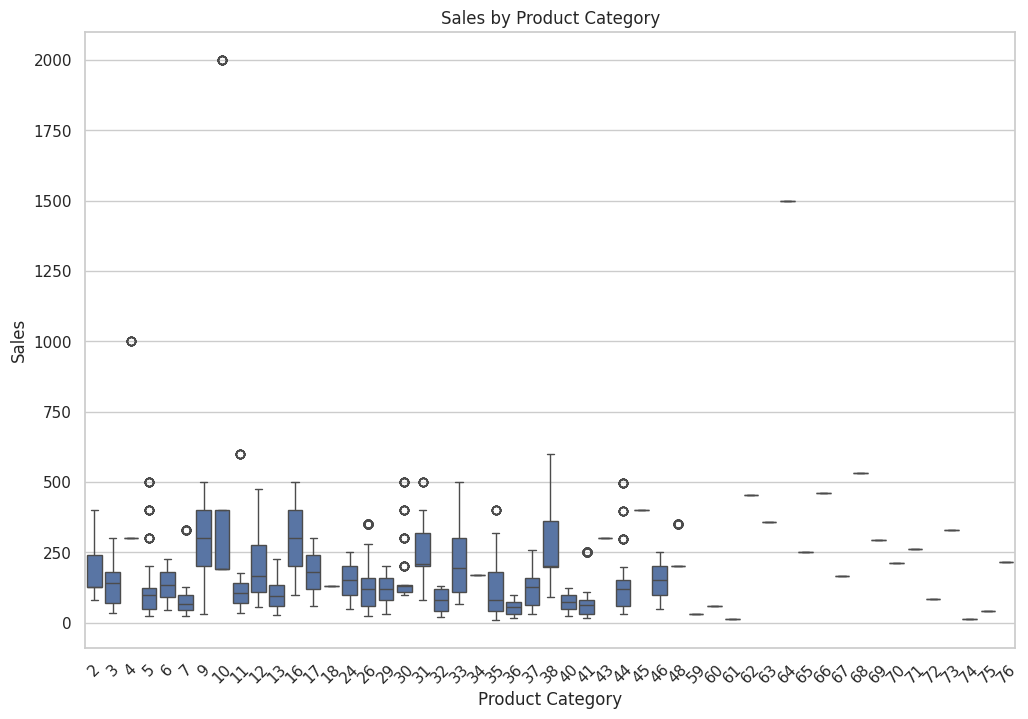

In [9]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Example 1: Distribution of Sales Amount
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales Amount')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

# Example 2: Sales by Product Category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Product_Category_Id', y='Sales', data=data)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

# Example 3: Monthly Sales Trend 
if 'date' in data.columns:
    data['month'] = data['date'].dt.to_period('M')
    monthly_sales = data.groupby('month')['Sales'].sum().reset_index()

    plt.figure(figsize=(14, 7))
    sns.lineplot(x='month', y='Sales', data=monthly_sales)
    plt.title('Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.xticks(rotation=45)
    plt.show()

In [11]:
# Group sales data by region
sales_by_region = data.groupby('Order_Country')['Sales'].sum().reset_index()

# Display the grouped data
sales_by_region.head()

,Order_Country,Sales
0,Albania,8.299130e+03
1,Alemania,2.074172e+06
2,Angola,5.766602e+04
3,Argelia,1.010955e+05
4,Argentina,3.787462e+05


from matplotlib import pyplot as plt
_df_0['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Order_Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Order_Country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Sales', y='Order_Country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)